<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/10)_A)_ON_Negative_Tweets_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Upload negative tweets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_NEG_COVID19_TWEETS_TOPICS.csv')
tweets_df = data.iloc[:, 1:]

In [6]:
tweets_df['Topic_Neg'] = tweets_df['Topic_Neg'].astype(str)

# Cutting up the dataset into Topics
filter1_topics = tweets_df['Topic_Neg'] == '0'
Topic_1 = tweets_df[filter1_topics]


filter2_topics = tweets_df['Topic_Neg'] == '1'
Topic_2 = tweets_df[filter2_topics]

filter3_topics = tweets_df['Topic_Neg'] == '2'
Topic_3 = tweets_df[filter3_topics]

filter4_topics = tweets_df['Topic_Neg'] == '3'
Topic_4 = tweets_df[filter4_topics]

filter5_topics = tweets_df['Topic_Neg'] == '4'
Topic_5 = tweets_df[filter5_topics]

group = tweets_df['Sentiment_Score_Norm'].groupby(tweets_df['Datetime'])
neg_sent_means = group.mean()

group_topic1 = Topic_1['Sentiment_Score_Norm'].groupby(Topic_1['Datetime'])
sent_avgs_topic1 = group_topic1.mean()

group_topic2 = Topic_2['Sentiment_Score_Norm'].groupby(Topic_2['Datetime'])
sent_avgs_topic2 = group_topic2.mean()

group_topic3 = Topic_3['Sentiment_Score_Norm'].groupby(Topic_3['Datetime'])
sent_avgs_topic3 = group_topic3.mean()

group_topic4 = Topic_4['Sentiment_Score_Norm'].groupby(Topic_4['Datetime'])
sent_avgs_topic4 = group_topic4.mean()

group_topic5 = Topic_5['Sentiment_Score_Norm'].groupby(Topic_5['Datetime'])
sent_avgs_topic5 = group_topic5.mean()

In [7]:
#overall sentiments
ngroup_all = tweets_df['Sentiment_Score'].groupby(tweets_df['Datetime'])
nsent_avgs_allTweets = ngroup_all.mean() 
print("Ontario's Negative tweets average sentiment:", nsent_avgs_allTweets.mean())

# Getting daily sentiments for topics 
ngroup_topic1 = Topic_1['Sentiment_Score'].groupby(Topic_1['Datetime'])
nsent_avgs_topic1 = ngroup_topic1.mean()
print("Ontario's Negative Topic 1 average sentiment:",nsent_avgs_topic1.mean())

ngroup_topic2 = Topic_2['Sentiment_Score'].groupby(Topic_2['Datetime'])
nsent_avgs_topic2 = ngroup_topic2.mean()
print("Ontario's Negative Topic 2 average sentiment:",nsent_avgs_topic2.mean())

ngroup_topic3 = Topic_3['Sentiment_Score'].groupby(Topic_3['Datetime'])
nsent_avgs_topic3 = ngroup_topic3.mean()
print("Ontario's Negative Topic 3 average sentiment:",nsent_avgs_topic3.mean())

ngroup_topic4 = Topic_4['Sentiment_Score'].groupby(Topic_4['Datetime'])
nsent_avgs_topic4 = ngroup_topic4.mean()
print("Ontario's Negative Topic 4 average sentiment:",nsent_avgs_topic4.mean())

ngroup_topic5 = Topic_5['Sentiment_Score'].groupby(Topic_5['Datetime'])
nsent_avgs_topic5 = ngroup_topic5.mean()
print("Ontario's Negative Topic 5 average sentiment:",nsent_avgs_topic5.mean())

Ontario's Negative tweets average sentiment: -0.5415470768861906
Ontario's Negative Topic 1 average sentiment: -0.5558822582577857
Ontario's Negative Topic 2 average sentiment: -0.5026708558944823
Ontario's Negative Topic 3 average sentiment: -0.5015950641648357
Ontario's Negative Topic 4 average sentiment: -0.5191390427679599
Ontario's Negative Topic 5 average sentiment: -0.6032639757514731


In [8]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topic_neg_list = tweets_df['Text'].tolist()
common_words = get_top_n_trigram(topic_neg_list, 15)

df_topic2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic2['trigram'], y=df_topic2['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for All Negative Topics"))
fig.show()

In [9]:
topic1_neg_list = Topic_1['Text'].tolist()
common_words = get_top_n_trigram(topic1_neg_list, 15)

df_topic_neg1 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg1['trigram'], y=df_topic_neg1['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Negative Topics 1"))
fig.show()

In [10]:
topic2_neg_list = Topic_2['Text'].tolist()
common_words = get_top_n_trigram(topic2_neg_list, 15)

df_topic_neg2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg2['trigram'], y=df_topic_neg2['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Negative Topic 2"))
fig.show()

In [11]:
for t in tweets_df['Text_Unprocessed'][:6000]:
  if 'legislation' in t:
    print(t)

 is there a reason you waited  years for thisyou:&gtcancelled ltc inspections in &gt let ltc residents die of thirst and starvation&gt let s die of covid while you:&gt rammed through legislation to protect owners of negligent ltcs from lawsuits&gt erected a fake iron ring
 wait till the covid disabilities start impacting people.  has been trying to change odsp legislation to make it harder for those with disabilities already. im afraid hell pull a mike harris and slash the payments. we need a universal income!
 stop deflecting. the third wave is all you. the variants are coming from all over usa, uk, brazil, india, s africa and not necessarily from direct flights. dont politicize the pandemic. your sick leave legislation is crap.
 moving forward we need legislation that ensures government can never have this much control of the people  ever again. ever. you all destroyed our chartered freedoms for a virus that has a . survivability rate 
    the only thing  and his pc govt did was enac

In [12]:
topic3_neg_list = Topic_3['Text'].tolist()
common_words = get_top_n_trigram(topic3_neg_list, 15)

df_topic_neg3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg1['trigram'], y=df_topic_neg3['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Negative Topic 3"))
fig.show()

In [13]:
topic4_neg_list = Topic_4['Text'].tolist()
common_words = get_top_n_trigram(topic4_neg_list, 15)

df_topic_neg4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg4['trigram'], y=df_topic_neg4['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Negative Topic 4"))
fig.show()

In [14]:
topic5_neg_list = Topic_5['Text'].tolist()
common_words = get_top_n_trigram(topic5_neg_list, 15)

df_topic_neg5 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg5['trigram'], y=df_topic_neg5['count'])])
fig.update_layout(title=go.layout.Title(text="Ontario - Top 15 Trigrams for Negative Topic 5"))
fig.show()

In [15]:
for t in Topic_1['Text_Unprocessed'][:20]:
  if 'captioned' or 'video' in t:
    print(t)

    here is one of those poor doctors here tonight. he will likely pass a million in billings for the pandemic.  so deserving and not the female dominated businesses that were shut down. 
  we will never be allowed to be done with this pandemic. screw you 
 do these  know that they are hiring documents servers that arent actually serving documents and then serving court with affidavits to get default judgements for  charges during a pandemic when victim had no idea.    
. i thought you were for the peoplewhy did you and your party just pass a motion giving you unchecked power with no legislature debate until december when your goal is to end the pandemic by fallsounds like youre only for yourself. rob wouldnt be proud of you rn
    very sad to see tweets like this. zero knowledge of pandemic response and zero knowledge of public health management.
 thanks ,  and the . theyre getting us closer to the end of this pandemic despite you douglas. meanwhile douglas robert ford jr unnecessaril

In [16]:
for t in Topic_1['Text'][:600]:
  if 'disability' in t:
    print(t)

lack clear concerted support plan child disability family devastating impact neglect feel year come
wait till covid disability start impact people try change odsp legislation hard disability I m afraid hell pull mike harris slash payment need universal income


In [17]:
for t in Topic_1['Text_Unprocessed'][:20]:
  if 'secrecy' or 'plan' in t:
    print(t)

    here is one of those poor doctors here tonight. he will likely pass a million in billings for the pandemic.  so deserving and not the female dominated businesses that were shut down. 
  we will never be allowed to be done with this pandemic. screw you 
 do these  know that they are hiring documents servers that arent actually serving documents and then serving court with affidavits to get default judgements for  charges during a pandemic when victim had no idea.    
. i thought you were for the peoplewhy did you and your party just pass a motion giving you unchecked power with no legislature debate until december when your goal is to end the pandemic by fallsounds like youre only for yourself. rob wouldnt be proud of you rn
    very sad to see tweets like this. zero knowledge of pandemic response and zero knowledge of public health management.
 thanks ,  and the . theyre getting us closer to the end of this pandemic despite you douglas. meanwhile douglas robert ford jr unnecessaril

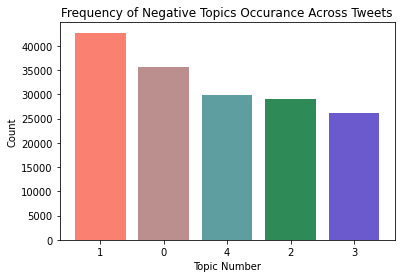

In [18]:
# Frequency of topic # and cluster # occurances across dataset
num_topics = tweets_df['Topic_Neg'].unique()
topic_counts = tweets_df['Topic_Neg'].value_counts()
plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'rosybrown', 'cadetblue', 'seagreen', 'slateblue'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Negative Topics Occurance Across Tweets")
plt.rc('figure', figsize=(11,11))
plt.show()

In [19]:
!pip install calmap
import calmap

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Ontario's tweets average sentiment: -0.5415470768861906


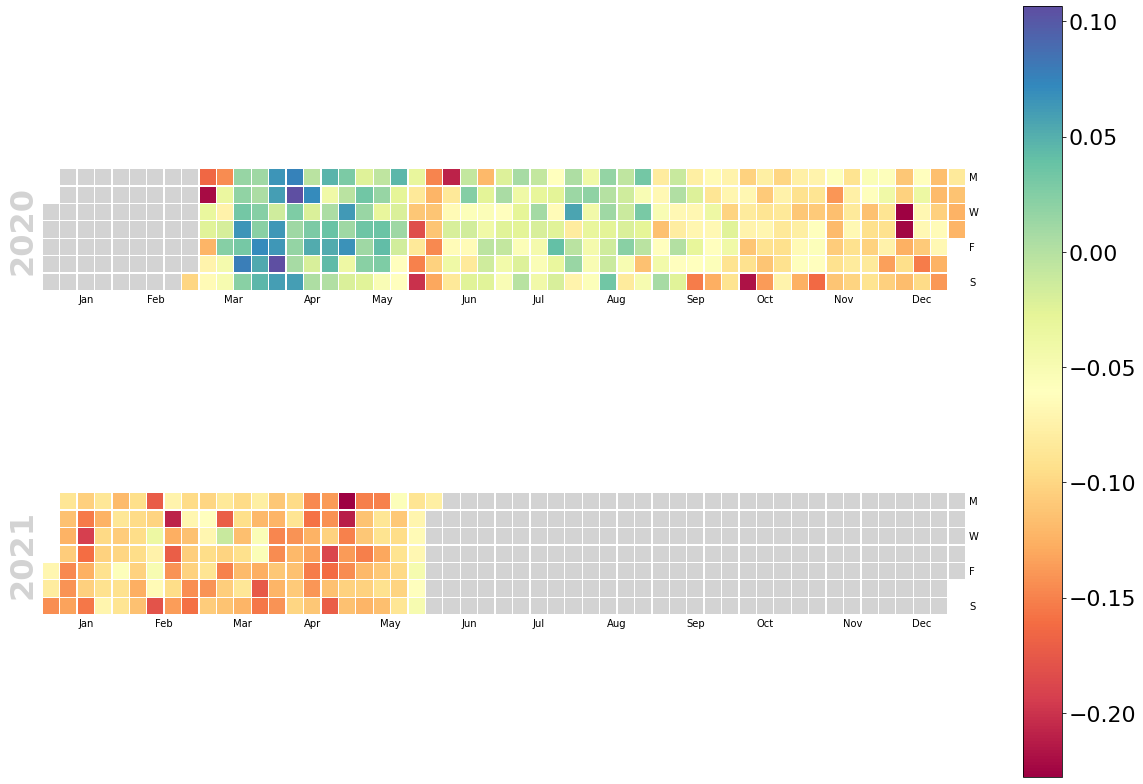

In [20]:
data_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_COVID19_TWEETS_SENTS.csv')
tweets_df_o = data_o.iloc[:, 1:]

#overall sentiments
ngroup_all_original = tweets_df_o['Sentiment_Score'].groupby(tweets_df_o['Datetime'])
nsent_avgs_allTweets_o = ngroup_all_original.mean() 
print("Ontario's tweets average sentiment:", nsent_avgs_allTweets.mean())
neg_sent_lsito = nsent_avgs_allTweets_o.to_list()
# Extra Negative Days out of all negative tweets
days = pd.DatetimeIndex(nsent_avgs_allTweets_o.index)
events = pd.Series(neg_sent_lsito, index=days)

fig, ax = calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap='Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

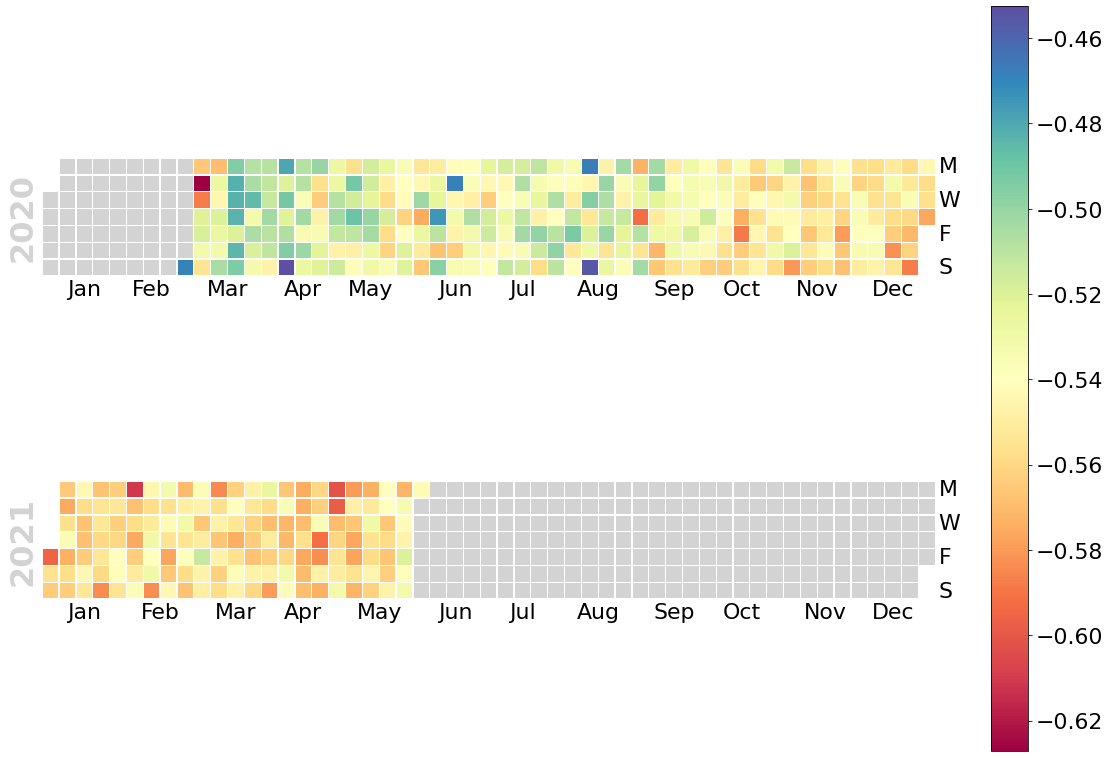

In [24]:
neg_sent_lsit = nsent_avgs_allTweets.to_list()
# Extra Negative Days out of all negative tweets
days = pd.DatetimeIndex(nsent_avgs_allTweets.index)
events = pd.Series(neg_sent_lsit, index=days)

fig, ax = calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

In [25]:
neg_sent_t1 = nsent_avgs_topic1.to_list()
neg_sent_t2 = nsent_avgs_topic2.to_list()
neg_sent_t3 = nsent_avgs_topic3.to_list()
neg_sent_t4 = nsent_avgs_topic4.to_list()
neg_sent_t5 = nsent_avgs_topic5.to_list()

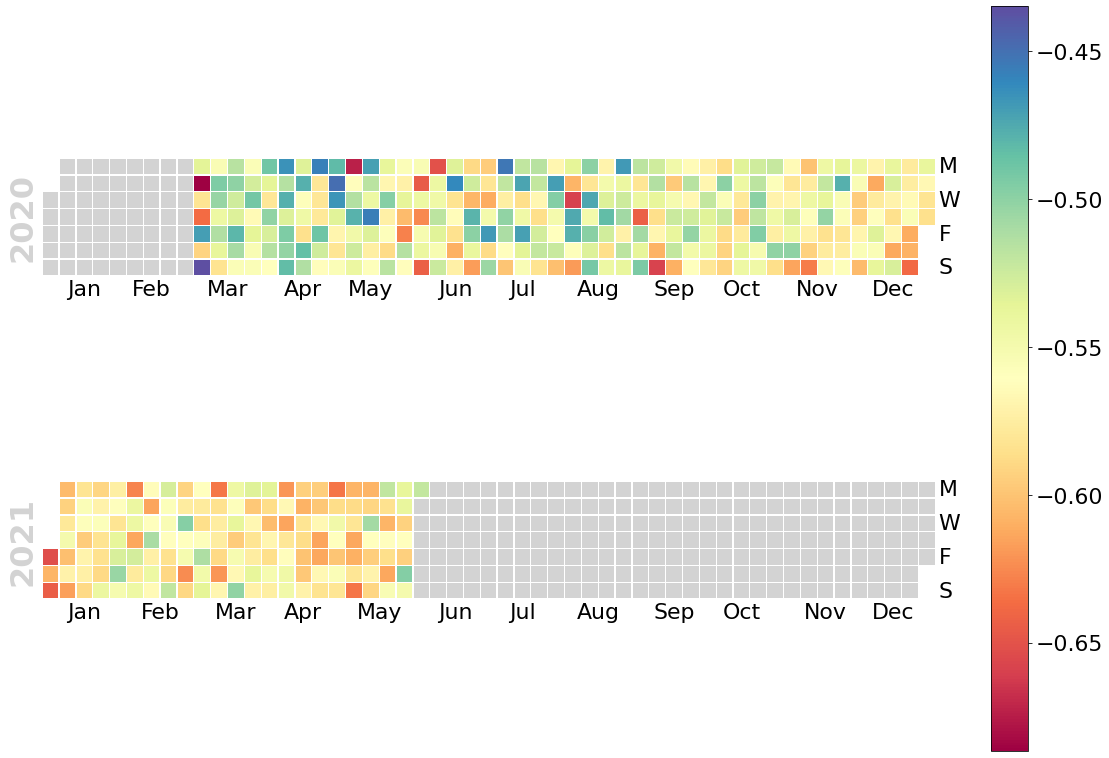

In [26]:
days1 = pd.DatetimeIndex(nsent_avgs_topic1.index)
events1 = pd.Series(neg_sent_t1, index=days1)

fig, ax = calmap.calendarplot(events1, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

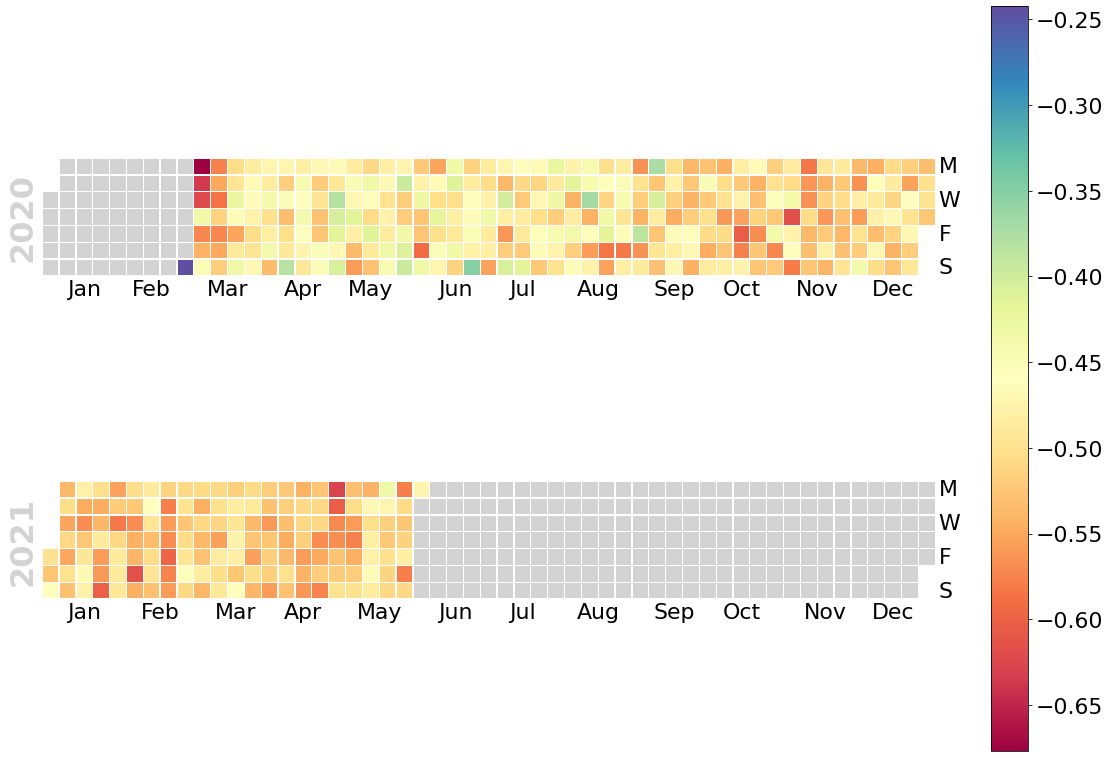

In [27]:
days2 = pd.DatetimeIndex(nsent_avgs_topic2.index)
events2 = pd.Series(neg_sent_t2, index=days2)

fig, ax = calmap.calendarplot(events2, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

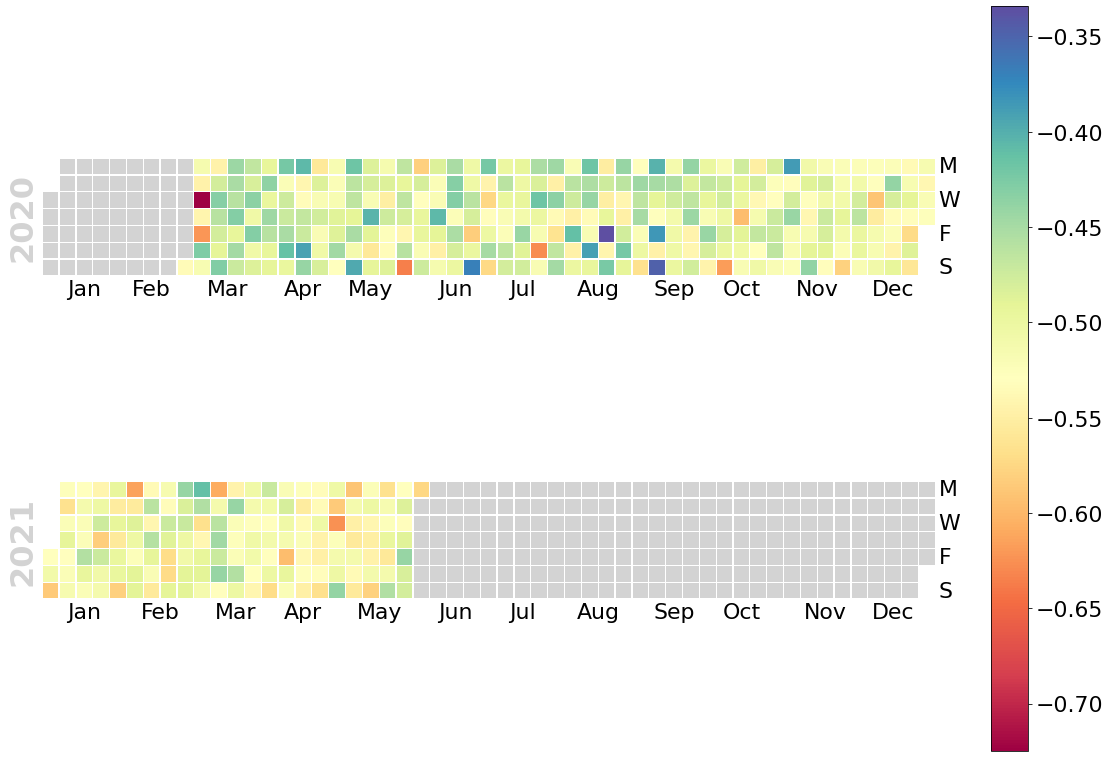

In [28]:
days3 = pd.DatetimeIndex(nsent_avgs_topic3.index)
events3 = pd.Series(neg_sent_t3, index=days3)

fig, ax = calmap.calendarplot(events3, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

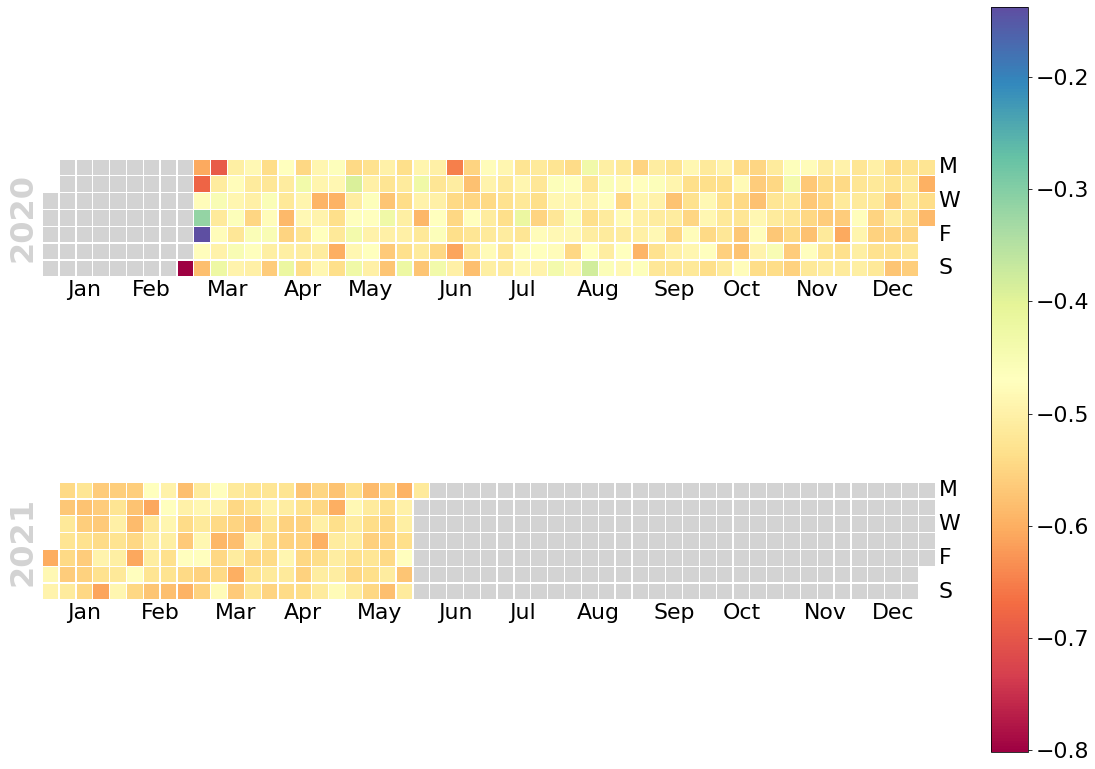

In [29]:
days4 = pd.DatetimeIndex(nsent_avgs_topic4.index)
events4 = pd.Series(neg_sent_t4, index=days4)

fig, ax = calmap.calendarplot(events4, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

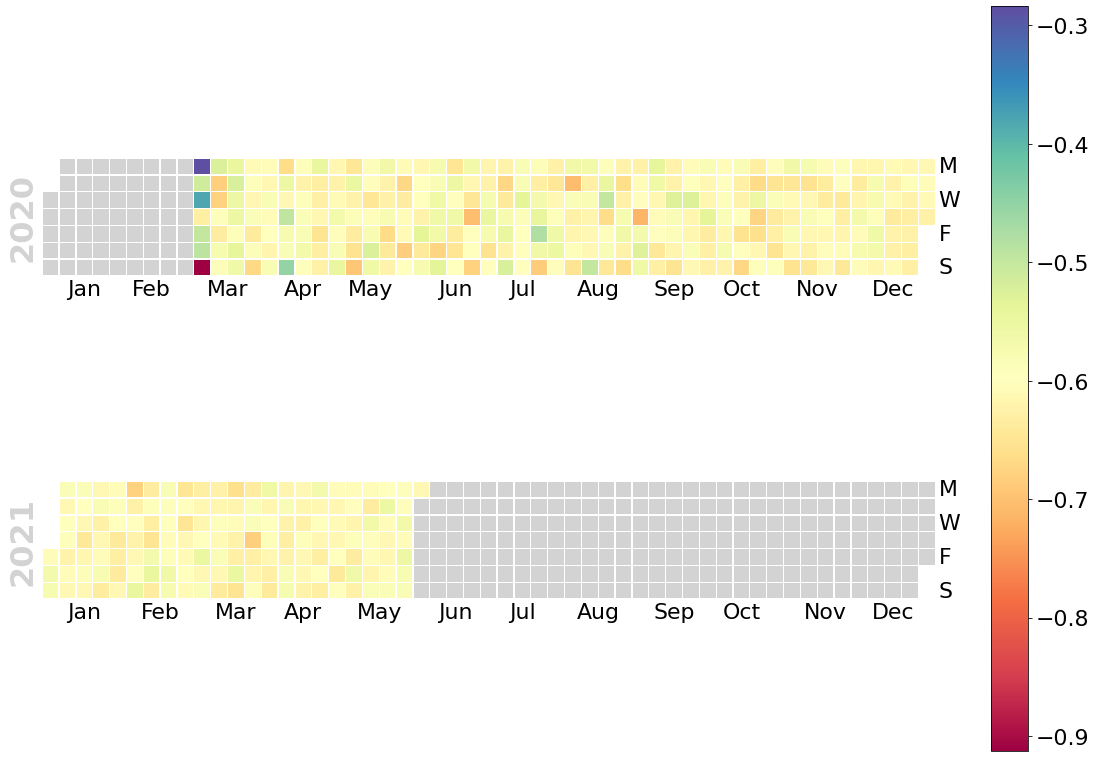

In [30]:
days5 = pd.DatetimeIndex(nsent_avgs_topic5.index)
events5 = pd.Series(neg_sent_t5, index=days5)

fig, ax = calmap.calendarplot(events5, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())